In [1]:
%run func_def.ipynb

imports loaded.

Pre-Processing func:
********************
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_perc(name, date, df)
    get_lose_streak_data_frame(name, date, df)
    get_win_streak_data_frame(name, date, df)
    get_streak_data_frame(name, date, df)
    get_win_streak(name, date, df)
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )
    add_columns(data, column_list)

Feature Engineering func:
*************************
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data)
    get_wins(combo, data)
    get_wins_ratio(combo, data)

stats_model_training func:
********************************
    get_sig_features(data, sig_r)
    get_r_score(X, y)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_random_forest_reg(X_columns, y_columns, data)
    set_predictions(mod

### <span style='color:green'> **[done]** </span>Loading stat_model trained data:

In [2]:
loc = '../data/'
file = 'fight_stat_data_trained.csv'
df = pd.read_csv(loc+file)
df.tail(3)

,set,date,fighter,opponent,result,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
6728,test,2017-07-29,Aleksandra Albu,Kailin Curran,win,U-DEC:,0.011068,-0.133163,1.590190,0.001133,0.157318,-0.236546,0.544717,-0.194404,0.584680,0.331559,0.477663,-1.248515,0.270739,2.060202,0.599149,-2.164903,0.061344,0.061344,0.061344,0.061344
6729,train,2017-07-29,Jarred Brooks,Eric Shelton,win,S-DEC:,0.011068,-0.133163,1.590190,0.001133,0.960129,0.218076,0.779264,0.377632,-0.294627,0.331559,-0.151239,-0.070965,-0.507334,0.015847,0.026948,-1.087573,-0.036048,-0.036048,-0.036048,-0.036048
6730,validation,2017-07-29,Drew Dober,Joshua Burkman,win,KO/TKO:Punch,1.365610,0.167994,0.011143,0.001133,-0.985573,-0.656198,-0.594516,-0.194404,1.116061,-0.236000,0.611992,0.013146,0.985268,0.143619,0.026948,-2.164903,0.084548,0.084548,0.084548,0.084548


In [3]:
req_data = ['set','date','fighter','opponent','method']
y = ['result']
X = ['kd_dif','str_dif','td_dif','sub_dif',
    'td avg._dif','td acc._dif','td def._dif','sub. avg._dif',
    'slpm_dif','str. acc._dif','sapm_dif','str. def_dif',
    'stance_win_ratio','win_perc_dif','win_strk_dif','lose_strk_dif']

df = df[req_data + X + y]
df.tail(3)

,set,date,fighter,opponent,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result
6728,test,2017-07-29,Aleksandra Albu,Kailin Curran,U-DEC:,0.011068,-0.133163,1.590190,0.001133,0.157318,-0.236546,0.544717,-0.194404,0.584680,0.331559,0.477663,-1.248515,0.270739,2.060202,0.599149,-2.164903,win
6729,train,2017-07-29,Jarred Brooks,Eric Shelton,S-DEC:,0.011068,-0.133163,1.590190,0.001133,0.960129,0.218076,0.779264,0.377632,-0.294627,0.331559,-0.151239,-0.070965,-0.507334,0.015847,0.026948,-1.087573,win
6730,validation,2017-07-29,Drew Dober,Joshua Burkman,KO/TKO:Punch,1.365610,0.167994,0.011143,0.001133,-0.985573,-0.656198,-0.594516,-0.194404,1.116061,-0.236000,0.611992,0.013146,0.985268,0.143619,0.026948,-2.164903,win


## <span style='color:green'> **[done]** </span> Random forest classifier model training:

In [4]:
rf_clf = set_random_forest_clf(X_columns=X, y_columns=y, data=df, n=10)
df = set_predictions(model=rf_clf, data=df, X_columns=X, y_columns=y)
df.tail(3)

,set,date,fighter,opponent,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result,result_pred
6728,test,2017-07-29,Aleksandra Albu,Kailin Curran,U-DEC:,0.011068,-0.133163,1.590190,0.001133,0.157318,-0.236546,0.544717,-0.194404,0.584680,0.331559,0.477663,-1.248515,0.270739,2.060202,0.599149,-2.164903,win,win
6729,train,2017-07-29,Jarred Brooks,Eric Shelton,S-DEC:,0.011068,-0.133163,1.590190,0.001133,0.960129,0.218076,0.779264,0.377632,-0.294627,0.331559,-0.151239,-0.070965,-0.507334,0.015847,0.026948,-1.087573,win,win
6730,validation,2017-07-29,Drew Dober,Joshua Burkman,KO/TKO:Punch,1.365610,0.167994,0.011143,0.001133,-0.985573,-0.656198,-0.594516,-0.194404,1.116061,-0.236000,0.611992,0.013146,0.985268,0.143619,0.026948,-2.164903,win,win


Accuracy = 0.865842


0.8658415841584158

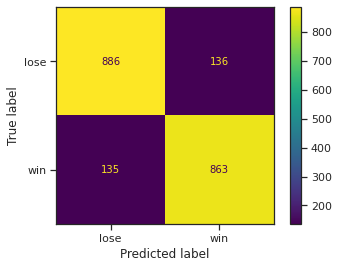

In [5]:
get_model_evaluation(data=df,y_column='result')

#### <span style='color:green'> **[done]** </span> Tune Model parameters:

In [6]:
sum_table = pd.DataFrame(columns=['n_estimators','accuracy'])

for n in tqdm([2,4,8,16,32,64,128,256]):
    sum_table = pd.concat([sum_table,get_clf_grad_desc_step( X_columns=X, y_columns=y, data=df, neighbors=n)],ignore_index=True)

sum_table.tail(5)

100%|██████████| 8/8 [00:03<00:00,  2.34it/s]


,n_estimators,accuracy
3,16,0.852778
4,32,0.861111
5,64,0.859028
6,128,0.859722
7,256,0.859722


,n_estimators,accuracy
0,32,0.861111


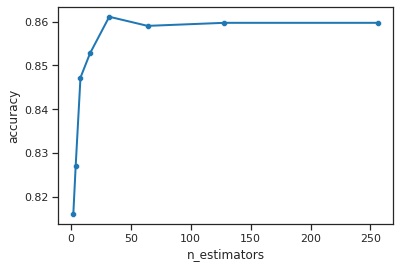

In [7]:
sns.scatterplot(data=sum_table, x='n_estimators', y='accuracy')
sns.lineplot(data=sum_table, x='n_estimators', y='accuracy')

t = sum_table[sum_table.accuracy == np.max(sum_table['accuracy'])].reset_index(drop=True)
opt_n_estimators = t.loc[0,'n_estimators']
opt_acc = t.loc[0,'accuracy']
t

#### <span style='color:green'> **[done]** </span> Train model with chosen parameters & 10-fold Cross Validation:

In [8]:
k = 10
size = len(df)
batch = int(size/k)
acc = []

for i in tqdm(range(0,size-batch,batch)):
    test_start = i
    test_end = i + batch - 1
    df.loc[:,'set'] = 'train'
    df.loc[test_start:test_end,'set'] = 'test'
    rf_clf = set_random_forest_clf(X_columns=X, y_columns=y, data=df, n=opt_n_estimators)
    df = set_predictions(model=rf_clf, data=df, X_columns=X, y_columns=y) 
    y_test_act = df['result'][df.set=='test']
    y_test_pred = df['result_pred'][df.set=='test']
    acc.append(get_accuracy(act=y_test_act, pred=y_test_pred))

opt_acc = np.mean(acc)    
print('%d-Fold cross-validation model accuracy: %.4f' %(k,opt_acc))

100%|██████████| 10/10 [00:03<00:00,  2.76it/s]

10-Fold cross-validation model accuracy: 0.8617


#### <span style='color:green'> **[done]** </span> Saving tuned parameters:

In [9]:
gp = pd.read_csv('../global_variables/ml_models_parameters.csv')
gp = gp[gp.ml_model != 'result_random_forest_classifier'].reset_index(drop=True)

param = pd.DataFrame(data={'ml_model':['result_random_forest_classifier'],
                          'parameter_name':['n_estimator'],
                          'value':[opt_n_estimators],
                          'accuracy':[opt_acc]}
                    )
gp = pd.concat([gp,param],ignore_index=True)
gp.to_csv('../global_variables/ml_models_parameters.csv', index=None)
print('../global_variables/ml_models_parameters.csv saved.')
gp

../global_variables/ml_models_parameters.csv saved.


,ml_model,parameter_name,value,accuracy
0,stats_random_forest_regressor,n_estimator,256,0.885400
1,result_random_forest_classifier,n_estimator,32,0.861664


#### <span style='color:green'> **[done]** </span> saving data:

In [10]:
df.to_csv('../data/fight_result_data_trained.csv',index=None)
print('../data/fight_result_data_trained.csv saved.')

../data/fight_result_data_trained.csv saved.
